In [24]:
from pathlib import Path

import pandas as pd

csv_dir = Path("../csvs")

In [25]:
metrics = pd.read_csv(csv_dir / "site_all_metrics.csv")
metrics = metrics.set_index("site")
metrics = metrics.drop(
    columns=["mean__point_density", "mean__pulse_density", "mean__scan_angle_mean"]
)
metrics

,mean__chm,mean__veg_height_mean,mean__veg_height_median,mean__crr,mean__veg_height_q10,mean__veg_height_q20,mean__veg_height_q30,mean__veg_height_q40,mean__veg_height_q50,mean__veg_height_q60,...,cv__veg_height_q10,cv__veg_height_q20,cv__veg_height_q30,cv__veg_height_q40,cv__veg_height_q50,cv__veg_height_q60,cv__veg_height_q70,cv__veg_height_q80,cv__veg_height_q90,cv__veg_height_sd
site,,,,,,,,,,,,,,,,,,,,,
EPO_O_04,38.239886,20.938319,22.086914,0.563695,6.262836,8.498231,11.945576,17.071111,22.086914,26.227880,...,0.633775,0.706210,0.824564,0.795170,0.700603,0.614381,0.543099,0.484259,0.420448,0.449315
EPO_O_13,27.299484,16.330332,18.209495,0.590778,4.237560,7.436393,11.010423,14.775973,18.209495,20.849932,...,1.492601,1.128032,0.873028,0.691271,0.558020,0.466389,0.399943,0.348970,0.298305,0.373991
EPO_Y_10,25.902798,16.164698,19.166753,0.611869,2.629280,7.353224,12.544017,16.477924,19.166753,21.015930,...,2.182693,1.161120,0.730367,0.526372,0.414246,0.345270,0.304034,0.274153,0.245014,0.285715
EPO_Y_15,19.754897,10.734614,11.556945,0.534772,2.083628,3.799574,5.932556,8.626876,11.556945,14.003930,...,1.468591,1.105599,0.908275,0.737616,0.581220,0.458214,0.367407,0.302001,0.252146,0.281878
EPO_Y_36,14.125612,7.580439,8.162662,0.520444,1.435573,2.539927,4.015971,6.003644,8.162662,9.936162,...,1.706825,1.379281,1.115465,0.879585,0.700694,0.573854,0.484873,0.417812,0.357854,0.388502
EPO_Y_37,19.546503,10.165970,10.397993,0.518785,2.772838,4.465560,6.103131,8.164133,10.397993,12.465643,...,0.712458,0.547563,0.558645,0.592401,0.572872,0.526243,0.474037,0.418664,0.360896,0.389745
EPY_O_01,24.300720,17.916120,19.992778,0.732646,8.897881,13.489861,16.589948,18.611931,19.992778,21.032876,...,0.849091,0.540430,0.376944,0.287055,0.236165,0.202078,0.180500,0.163776,0.148595,0.367136
EPY_O_07,19.011238,12.009557,13.073561,0.623439,4.584510,7.153707,9.426508,11.397693,13.073561,14.470662,...,0.715653,0.561968,0.461390,0.389652,0.338139,0.299495,0.270320,0.246544,0.221826,0.277585
EPY_O_09,16.115101,12.049795,13.220504,0.740153,6.920292,9.278779,11.017379,12.310377,13.220504,13.867870,...,0.776459,0.589790,0.477020,0.400575,0.352142,0.320668,0.296928,0.277454,0.257832,0.477411


In [26]:
# Import libraries for correlation analysis and visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

# Set style for better visualizations
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")

In [27]:
# Use spearman cos handles nonlinear relationships and outliers
corr_matrix = metrics.corr(method="pearson")

# Distance matrix is 1 - absolute correlation
distance_matrix = 1 - corr_matrix.abs()

# Condense the matrix into 1D
condensed_distances = squareform(distance_matrix)

# Perform hierarchical clustering using Ward method
linkage_matrix = hierarchy.linkage(condensed_distances, method="complete")

distance_threshold = 0.3
clusters = hierarchy.fcluster(linkage_matrix, distance_threshold, criterion="distance")
cluster_df = pd.DataFrame(
    {"metric": metrics.columns, "cluster": clusters}
).sort_values("cluster")
cluster_df

,metric,cluster
47,sd__canopy_cover_gt1m,1
48,sd__canopy_cover_gt1m_w,1
55,sd__norm_shann_capture,1
56,sd__norm_shann_capture_w,1
51,sd__vci,1
...,...,...
7,mean__veg_height_q40,11
5,mean__veg_height_q20,11
6,mean__veg_height_q30,11
4,mean__veg_height_q10,11


In [28]:
corr_matrix.index.name = "metric"
corr_matrix.to_csv(csv_dir / "metric_correlation.csv", index=True)
cluster_df.to_csv(csv_dir / "metric_clusters.csv", index=False)

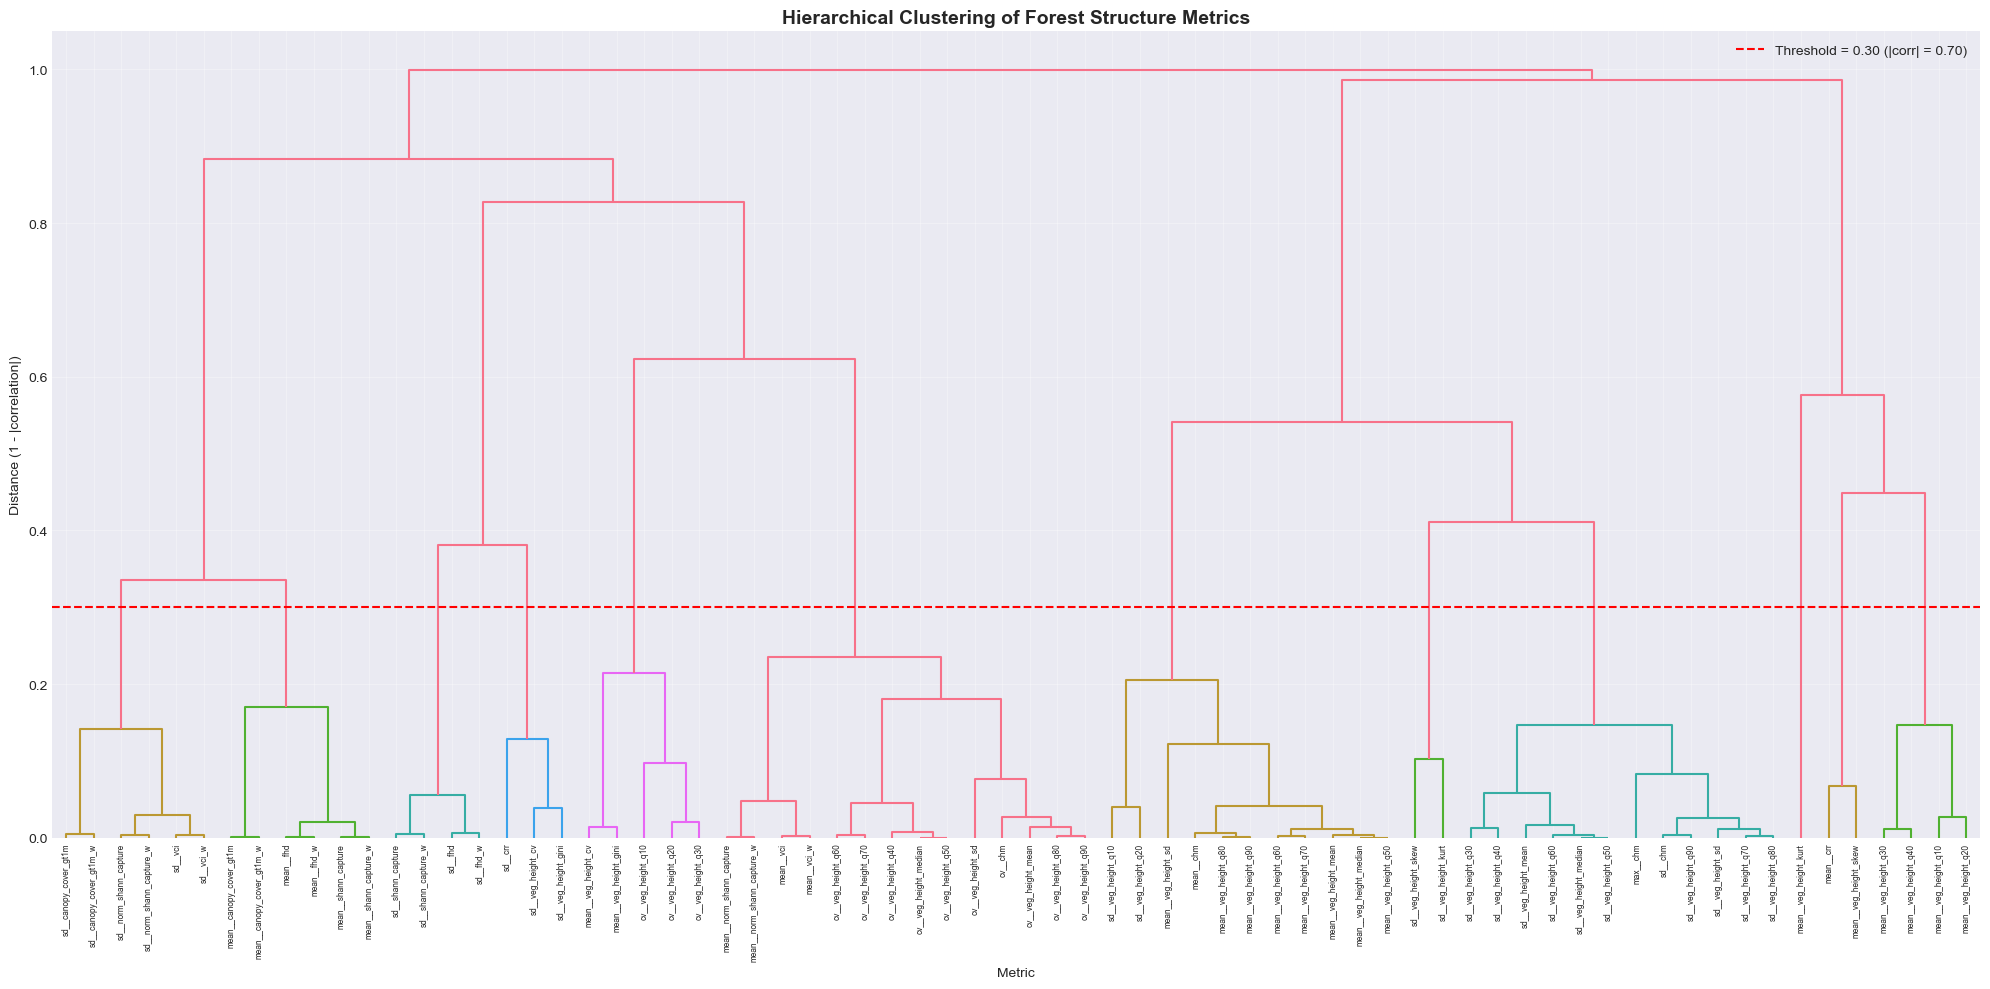

In [29]:
# Create dendrogram with color threshold
fig, ax = plt.subplots(figsize=(20, 10))


# Create dendrogram
dendrogram = hierarchy.dendrogram(
    linkage_matrix,
    labels=metrics.columns,
    ax=ax,
    leaf_rotation=90,
    leaf_font_size=6,
    color_threshold=distance_threshold,
)

ax.set_title(
    "Hierarchical Clustering of Forest Structure Metrics",
    fontsize=14,
    fontweight="bold",
)
ax.set_xlabel("Metric", fontsize=10)
ax.set_ylabel("Distance (1 - |correlation|)", fontsize=10)
ax.axhline(
    y=distance_threshold,
    c="red",
    linestyle="--",
    linewidth=1.5,
    label=f"Threshold = {distance_threshold:.2f} (|corr| = {1 - distance_threshold:.2f})",
)
ax.legend(loc="upper right", fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

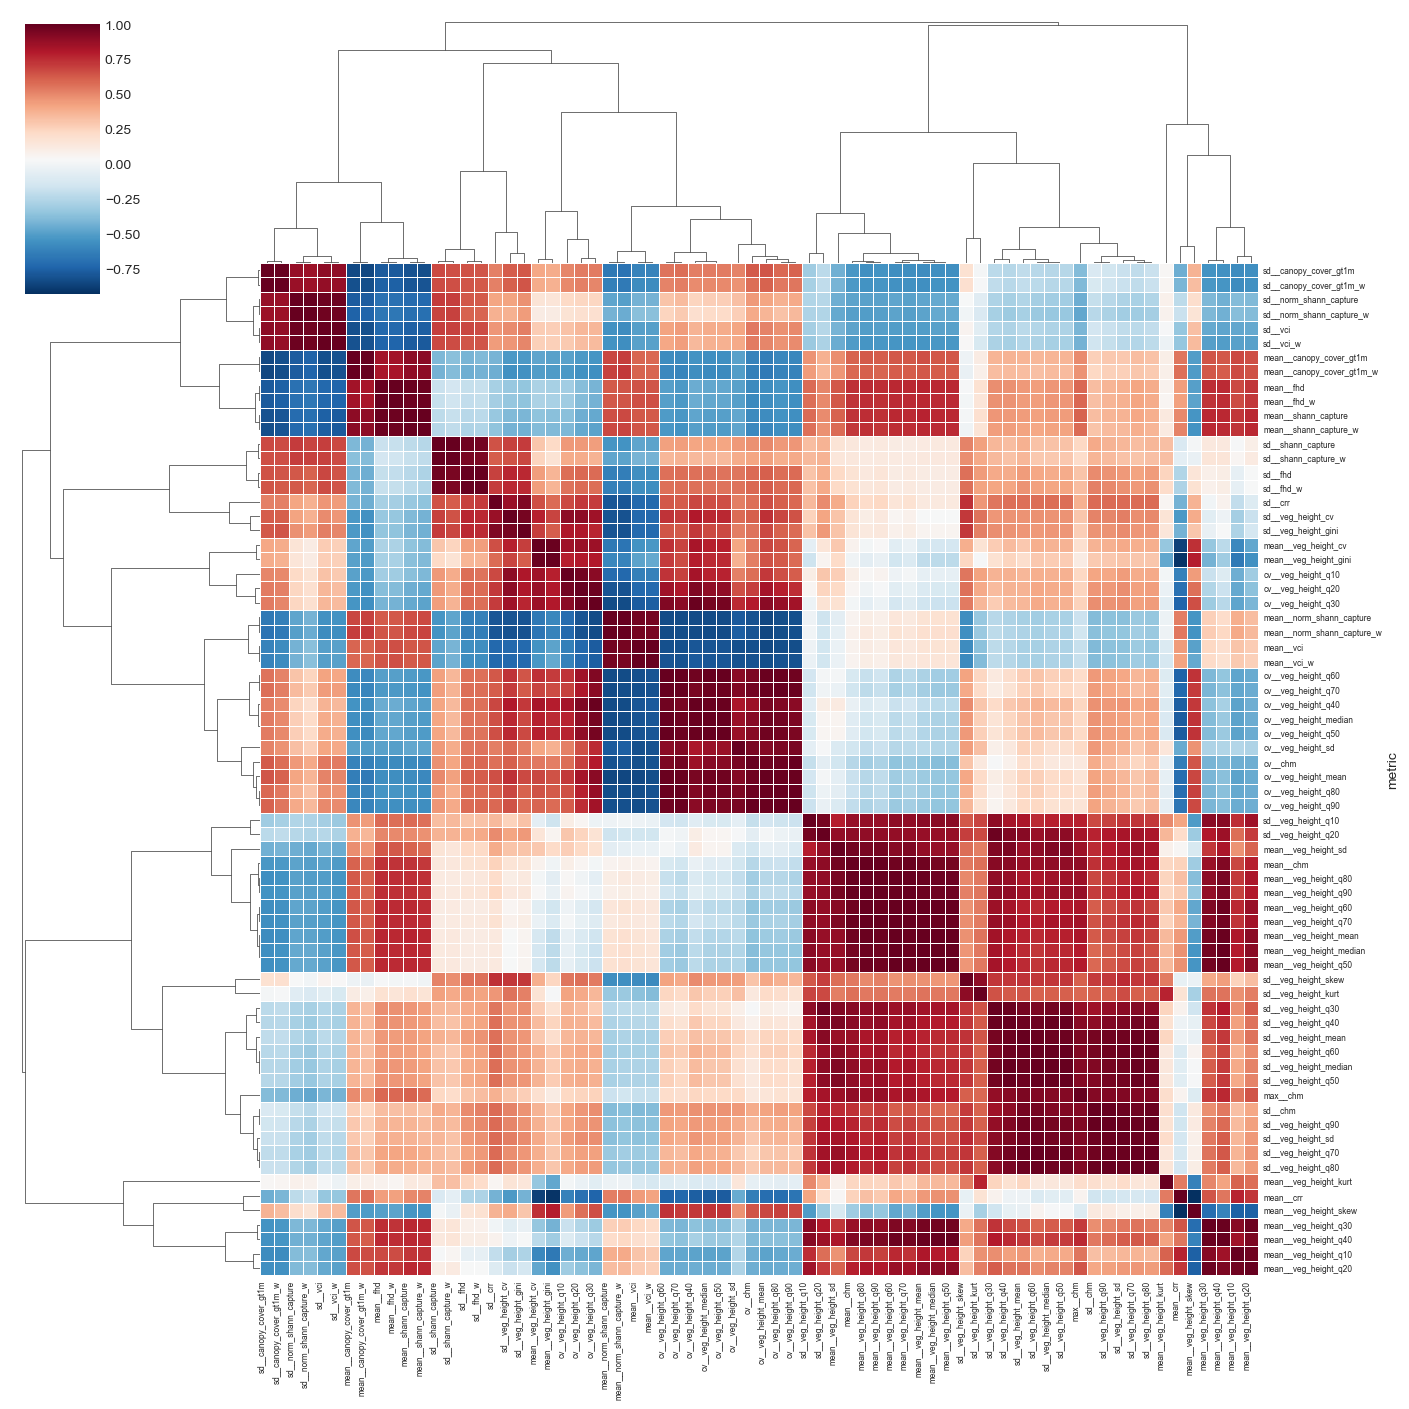

In [30]:
# Create clustermap with smaller font sizes for better readability
g = sns.clustermap(
    corr_matrix,
    cmap="RdBu_r",
    linewidths=0.5,
    figsize=(15, 15),
    row_linkage=linkage_matrix,
    col_linkage=linkage_matrix,
    xticklabels=True,
    yticklabels=True,
)

# Adjust font sizes for the tick labels
g.ax_heatmap.tick_params(axis="x", labelsize=6)
g.ax_heatmap.tick_params(axis="y", labelsize=6)

# Rotate x-axis labels for better readability
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90, ha="right")
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)

plt.show()


In [ ]:
# Wrie metric clusters to CSV

In [32]:
# Import numpy for array operations
import numpy as np

# Analyze each cluster: number of metrics and minimum absolute correlation
print("Cluster Analysis:")
print("=" * 50)

for cluster_id in sorted(cluster_df['cluster'].unique()):
    # Get metrics in this cluster
    cluster_metrics = cluster_df[cluster_df['cluster'] == cluster_id]['metric'].tolist()
    
    # Get correlation submatrix for this cluster
    if len(cluster_metrics) > 1:
        cluster_corr = corr_matrix.loc[cluster_metrics, cluster_metrics]
        
        # Get upper triangle (excluding diagonal) to avoid duplicates and self-correlations
        mask = np.triu(np.ones_like(cluster_corr, dtype=bool), k=1)
        upper_triangle_corr = cluster_corr.where(mask)
        
        # Get minimum absolute correlation
        min_abs_corr = upper_triangle_corr.abs().min().min()
        
        print(f"Cluster {cluster_id}:")
        print(f"  Number of metrics: {len(cluster_metrics)}")
        print(f"  Minimum absolute correlation: {min_abs_corr:.3f}")
        print(f"  Metrics: {', '.join(cluster_metrics)}")
        print()
    else:
        print(f"Cluster {cluster_id}:")
        print(f"  Number of metrics: {len(cluster_metrics)}")
        print(f"  Minimum absolute correlation: N/A (single metric)")
        print(f"  Metrics: {', '.join(cluster_metrics)}")
        print()

Cluster Analysis:
Cluster 1:
  Number of metrics: 6
  Minimum absolute correlation: 0.858
  Metrics: sd__canopy_cover_gt1m, sd__canopy_cover_gt1m_w, sd__norm_shann_capture, sd__norm_shann_capture_w, sd__vci, sd__vci_w

Cluster 2:
  Number of metrics: 6
  Minimum absolute correlation: 0.830
  Metrics: mean__canopy_cover_gt1m, mean__canopy_cover_gt1m_w, mean__fhd, mean__fhd_w, mean__shann_capture_w, mean__shann_capture

Cluster 3:
  Number of metrics: 4
  Minimum absolute correlation: 0.944
  Metrics: sd__shann_capture, sd__fhd_w, sd__fhd, sd__shann_capture_w

Cluster 4:
  Number of metrics: 3
  Minimum absolute correlation: 0.871
  Metrics: sd__crr, sd__veg_height_gini, sd__veg_height_cv

Cluster 5:
  Number of metrics: 5
  Minimum absolute correlation: 0.786
  Metrics: mean__veg_height_cv, cv__veg_height_q30, mean__veg_height_gini, cv__veg_height_q10, cv__veg_height_q20

Cluster 6:
  Number of metrics: 14
  Minimum absolute correlation: 0.765
  Metrics: cv__veg_height_median, mean__vci

## Manual Selection

At this point the selected_metrics.csv is manually chosen by selecting metrics from the metrics_cluster_df

In [21]:
selected_metric_names = pd.read_csv(csv_dir / "selected_metrics.csv")
selected_metric_names = selected_metric_names[selected_metric_names['selected'] == 'yes']
selected_metric_names

,metric,cluster,selected,category
0,mean__chm,7,yes,H
1,max__chm,9,yes,H
2,mean__veg_height_q30,11,yes,H
3,mean__canopy_cover_gt1m,2,yes,C
4,mean__fhd,2,yes,VC
5,mean__veg_height_cv,5,yes,VC
6,mean__vci,6,yes,VC
7,mean__crr,10,yes,VC
8,mean__veg_height_kurt,12,yes,VC
9,sd__chm,9,yes,h H


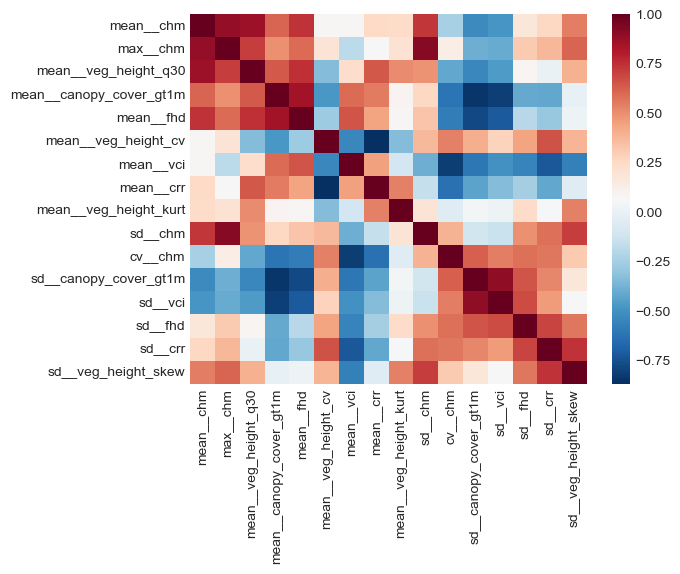

In [22]:
selected_corr_matrix = metrics[selected_metric_names.metric].corr()

# Create clustermap with smaller font sizes for better readability
g = sns.heatmap(
    selected_corr_matrix,
    cmap="RdBu_r",
    #    linewidths=0.5,
    #    figsize=(15, 15),
    xticklabels=True,
    yticklabels=True,
    #    method='complete'
)

# Adjust font sizes for the tick labels
# g.ax_heatmap.tick_params(axis='x', labelsize=6)
# g.ax_heatmap.tick_params(axis='y', labelsize=6)

# Rotate x-axis labels for better readability
# plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90, ha='right')
# plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)

plt.show()


In [23]:
selected_corr_matrix.to_csv(csv_dir / "selected_metrics_correlation.csv")

In [ ]:
site_selected_metrics = metrics[selected_metric_names.metric]
site_selected_metrics.to_csv(csv_dir / "site_representative_metrics.csv")
site_selected_metrics

,mean__chm,max__chm,mean__veg_height_q30,mean__canopy_cover_gt1m,mean__fhd,mean__veg_height_cv,mean__vci,mean__crr,mean__veg_height_kurt,sd__chm,cv__chm,sd__canopy_cover_gt1m,sd__vci,sd__fhd,sd__crr,sd__veg_height_skew
site,,,,,,,,,,,,,,,,
EPO_O_04,38.239886,52.3364,11.945576,0.868069,2.177094,0.620750,0.546357,0.563695,0.187544,13.330358,0.348752,0.125496,0.114871,0.457687,0.167676,1.283775
EPO_O_13,27.299484,38.0424,11.010423,0.685449,1.972776,0.661154,0.536631,0.590778,0.207591,6.769295,0.246819,0.203709,0.141558,0.520719,0.175375,1.208187
EPO_Y_10,25.902798,32.9526,12.544017,0.652079,2.086827,0.640253,0.588872,0.611869,0.399777,5.477748,0.214736,0.193605,0.152311,0.538408,0.150632,1.099697
EPO_Y_15,19.754897,26.8930,5.932556,0.774936,2.093690,0.693868,0.624400,0.534772,-0.691528,4.028354,0.204997,0.144095,0.103413,0.346978,0.142027,0.930350
EPO_Y_36,14.125612,20.8292,4.015971,0.684135,1.622504,0.758431,0.523706,0.520444,-0.234955,4.098733,0.295683,0.197953,0.139617,0.430635,0.160847,1.122658
EPO_Y_37,19.546503,29.8392,6.103131,0.900535,2.201588,0.601493,0.638667,0.518785,-0.231919,5.400514,0.284503,0.104405,0.102920,0.354001,0.131940,0.901474
EPY_O_01,24.300720,30.3114,16.589948,0.723886,2.102990,0.394931,0.608015,0.732646,2.615524,3.348425,0.137875,0.161273,0.132946,0.459745,0.128598,1.109719
EPY_O_07,19.011238,26.9406,9.426508,0.723917,2.326841,0.459757,0.694907,0.623439,-0.267701,3.608839,0.193783,0.120105,0.117699,0.392896,0.115948,0.733684
EPY_O_09,16.115101,22.3550,11.017379,0.624741,1.597490,0.379940,0.500202,0.740153,1.688820,3.817097,0.236906,0.190139,0.134313,0.429018,0.153667,1.239037


In [36]:
plot_metrics = pd.read_csv(csv_dir / "plot_all_metrics.csv").set_index('id')
selected_plot_metrics = plot_metrics[['site', *selected_metric_names.metric]]
selected_plot_metrics.to_csv(csv_dir / "plot_representative_metrics.csv")
selected_plot_metrics

,site,mean__chm,max__chm,mean__veg_height_q30,mean__canopy_cover_gt1m,mean__fhd,mean__veg_height_cv,mean__vci,mean__crr,mean__veg_height_kurt,sd__chm,cv__chm,sd__canopy_cover_gt1m,sd__vci,sd__fhd,sd__crr,sd__veg_height_skew
id,,,,,,,,,,,,,,,,,
AGG_O_01_P1,AGG_O_01,9.104318,16.276,3.608292,0.563681,1.716545,0.629295,0.593884,0.555466,-0.295746,3.039098,0.333808,0.206063,0.155163,0.448478,0.132860,0.870518
AGG_O_01_P2,AGG_O_01,9.143720,17.180,4.114914,0.579256,1.706308,0.566791,0.579502,0.587945,-0.204057,2.943623,0.321928,0.207027,0.166974,0.491646,0.129502,0.772531
AGG_O_01_P3,AGG_O_01,10.808279,21.463,4.482414,0.631519,1.844224,0.607386,0.456147,0.566187,-0.226870,2.920032,0.270166,0.189898,0.100575,0.406628,0.135061,0.886172
AGG_O_01_P4,AGG_O_01,26.233368,65.734,8.552811,0.770334,2.015243,0.675599,0.479284,0.515107,0.353507,19.107834,0.728379,0.227290,0.134553,0.565755,0.169970,1.181471
AGG_O_01_P5,AGG_O_01,33.688303,73.597,13.305916,0.819641,2.245093,0.576981,0.520000,0.559599,0.383881,19.933778,0.591712,0.182743,0.115756,0.499773,0.159767,1.086882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ULY_Y_96_P1,ULY_Y_96,8.352560,23.539,3.008736,0.505467,1.354531,0.683211,0.415743,0.509003,0.652704,5.543308,0.663666,0.349325,0.197820,0.644517,0.193448,1.282089
ULY_Y_96_P2,ULY_Y_96,6.701582,29.473,1.630950,0.349552,1.070607,0.744658,0.311768,0.460762,0.613761,7.097442,1.059070,0.317186,0.193562,0.664690,0.173012,1.180520
ULY_Y_96_P3,ULY_Y_96,4.673009,25.916,0.897068,0.376699,1.024145,0.706706,0.310739,0.441329,0.830103,4.603342,0.985092,0.291885,0.166877,0.549998,0.164585,1.100349
